  # ARTIFICIAL NEURAL NETWORK

# Nama : Muhammad Hafizd
# Nim    : 09011381722128
# Kelas : SK5U

# HEPATITIS

Penyakit hepatitis adalah penyakit yang disebabkan oleh virus hepatitis akibat dari adanya peradangan hati. Ada 5 jenis virus hepatitis: A, B, C, D, dan E. Karakteristik dari masing-masing jenis ini berbeda, maka dari itu gejala dan pengobatannya juga beragam.

#  Mengimport library </h1>

Pada kasus ini library yang digunakan adalah 

-Numpy

-Squential

-Dense

-MinMaxScaler 

-to_categorical.

Dimana numpy digunakan untuk mengelola data.

In [1]:
#mengimport numpy untuk membaca file direktori
import numpy
# from keras.models import Sequential
from keras.models import Sequential
#mengimport dense pada direktori keras.layer, untuk membuat hidden layer
from keras.layers import Dense
#menggunakan metode StandarScaler
from sklearn.preprocessing import MinMaxScaler
#untuk mengkonversi data binary menjadi data yang dapat diolah menjadi confusion matrix
from keras.utils.np_utils import to_categorical 
# fix random seed for reproducibility
numpy.random.seed(19)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

C:\Users\Hafidz\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


###  Load Data
Dataset yang digunakan pada proses Neural Network kali ini menggunakan dengan bentuk format .csv yang merupakan data vektor yang berisi angka-angka sehingga dapat diproses oleh IDE dengan lebih mudah.

In [2]:
dataset = numpy.loadtxt("data_hepatitis.csv", delimiter=";")

X = dataset[:,0:18]
Y = dataset[:,18]

In [3]:
X

array([[30. ,  2. ,  1. , ..., 18. ,  4. ,  0. ],
       [50. ,  1. ,  1. , ..., 42. ,  3.5,  0. ],
       [78. ,  1. ,  2. , ..., 32. ,  4. ,  0. ],
       ...,
       [61. ,  1. ,  1. , ..., 20. ,  4.1,  0. ],
       [53. ,  2. ,  1. , ..., 19. ,  4.1, 48. ],
       [43. ,  1. ,  2. , ..., 19. ,  3.1, 42. ]])

In [4]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

# Processing medote
Dalam memproses dataset yang akan digunakan, disini saya menggunakan metode minMaxscaler untuk variabel X.

In [5]:
sc = MinMaxScaler()
X = sc.fit_transform(X)

# Categorical
Untuk melihat performance dari neural network, sehingga diperlukan confusion matrix dimana dengan mengubah kasifikasi data yang pada awalnya binary classification menjadi categorical classification.

In [6]:
Y_Categorical = to_categorical(Y)
Y_Categorical.shape

(155, 2)

# splitting and modeling
Pada tahap ini kita membuat file test berukuran 20% dari jumlah keseluruhan data yang tersedia secara acak.

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, shuffle=True, stratify=Y)

Setelah itu kita membuat model NN dengan 50 hiden layer pertama, 50 hiden layer kedua, 50 hiden layer ketiga dan 50 hiden layer keempat. Selain itu kita membuat output layer 1 (iya atau tidak)

In [8]:
model = Sequential()
model.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile Model
Setelah melakukan proses definisi model, selanjutnya ialah mengcompile dari setiap model tersebut sehingga menjadi satu kesatuan hidden yang biasa disebut dengan Hidden Layer.

In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Setalah itu kita lakukan fit model.

pada proses ini terjadi proses training dengan parameter:

1. X yang telah di preprocessing yaitu X_train
2. Y yang telah dikonversi menjadi categorical yaitu Y_Categorical
3. Banyaknya Epochs yang saya gunakan adalah 130
4. Validation_split yang saya gunakan adalah 0.2
5. batch_size yang saya gunakan adalah 10

In [10]:
# Fit the model
history=model.fit(X_train, Y_train, validation_split=0.2, epochs=250, batch_size=32)

Train on 99 samples, validate on 25 samples
Epoch 1/250
99/99 [==============================] - 1s 10ms/step - loss: 0.6895 - accuracy: 0.5354 - val_loss: 0.6806 - val_accuracy: 0.5600
Epoch 2/250
99/99 [==============================] - 0s 356us/step - loss: 0.6753 - accuracy: 0.5556 - val_loss: 0.6772 - val_accuracy: 0.5600
Epoch 3/250
99/99 [==============================] - 0s 212us/step - loss: 0.6710 - accuracy: 0.5960 - val_loss: 0.6734 - val_accuracy: 0.5600
Epoch 4/250
99/99 [==============================] - 0s 195us/step - loss: 0.6642 - accuracy: 0.6061 - val_loss: 0.6683 - val_accuracy: 0.5600
Epoch 5/250
99/99 [==============================] - 0s 166us/step - loss: 0.6586 - accuracy: 0.5859 - val_loss: 0.6665 - val_accuracy: 0.5600
Epoch 6/250
99/99 [==============================] - 0s 165us/step - loss: 0.6521 - accuracy: 0.6061 - val_loss: 0.6640 - val_accuracy: 0.6000
Epoch 7/250
99/99 [==============================] - 0s 179us/step - loss: 0.6462 - accuracy: 0.666

99/99 [==============================] - 0s 175us/step - loss: 0.4589 - accuracy: 0.7677 - val_loss: 0.6325 - val_accuracy: 0.7600
Epoch 58/250
99/99 [==============================] - 0s 218us/step - loss: 0.4583 - accuracy: 0.7980 - val_loss: 0.6328 - val_accuracy: 0.6800
Epoch 59/250
99/99 [==============================] - ETA: 0s - loss: 0.5364 - accuracy: 0.65 - 0s 240us/step - loss: 0.5170 - accuracy: 0.7071 - val_loss: 0.6380 - val_accuracy: 0.7200
Epoch 60/250
99/99 [==============================] - 0s 199us/step - loss: 0.4799 - accuracy: 0.7576 - val_loss: 0.6560 - val_accuracy: 0.7600
Epoch 61/250
99/99 [==============================] - 0s 233us/step - loss: 0.4707 - accuracy: 0.7677 - val_loss: 0.7201 - val_accuracy: 0.6000
Epoch 62/250
99/99 [==============================] - 0s 191us/step - loss: 0.4816 - accuracy: 0.7778 - val_loss: 0.6485 - val_accuracy: 0.7600
Epoch 63/250
99/99 [==============================] - 0s 227us/step - loss: 0.4392 - accuracy: 0.8283 - val

99/99 [==============================] - 0s 219us/step - loss: 0.3430 - accuracy: 0.8788 - val_loss: 0.8576 - val_accuracy: 0.6800
Epoch 114/250
99/99 [==============================] - 0s 152us/step - loss: 0.2984 - accuracy: 0.9091 - val_loss: 0.8357 - val_accuracy: 0.6400
Epoch 115/250
99/99 [==============================] - 0s 198us/step - loss: 0.3726 - accuracy: 0.7980 - val_loss: 0.7920 - val_accuracy: 0.6000
Epoch 116/250
99/99 [==============================] - 0s 267us/step - loss: 0.3170 - accuracy: 0.8687 - val_loss: 0.7798 - val_accuracy: 0.6400
Epoch 117/250
99/99 [==============================] - 0s 177us/step - loss: 0.3049 - accuracy: 0.8788 - val_loss: 0.7824 - val_accuracy: 0.6400
Epoch 118/250
99/99 [==============================] - 0s 200us/step - loss: 0.2982 - accuracy: 0.8889 - val_loss: 0.8170 - val_accuracy: 0.7200
Epoch 119/250
99/99 [==============================] - 0s 268us/step - loss: 0.2855 - accuracy: 0.9091 - val_loss: 0.8157 - val_accuracy: 0.6800

99/99 [==============================] - 0s 198us/step - loss: 0.1912 - accuracy: 0.9293 - val_loss: 1.0616 - val_accuracy: 0.6800
Epoch 170/250
99/99 [==============================] - 0s 199us/step - loss: 0.1810 - accuracy: 0.9495 - val_loss: 1.0603 - val_accuracy: 0.6000
Epoch 171/250
99/99 [==============================] - 0s 226us/step - loss: 0.1832 - accuracy: 0.9394 - val_loss: 1.0763 - val_accuracy: 0.6000
Epoch 172/250
99/99 [==============================] - 0s 204us/step - loss: 0.1669 - accuracy: 0.9495 - val_loss: 1.1008 - val_accuracy: 0.6400
Epoch 173/250
99/99 [==============================] - 0s 259us/step - loss: 0.1655 - accuracy: 0.9394 - val_loss: 1.1495 - val_accuracy: 0.6400
Epoch 174/250
99/99 [==============================] - 0s 263us/step - loss: 0.1841 - accuracy: 0.9293 - val_loss: 1.1158 - val_accuracy: 0.6000
Epoch 175/250
99/99 [==============================] - 0s 210us/step - loss: 0.1779 - accuracy: 0.9394 - val_loss: 1.1390 - val_accuracy: 0.5600

99/99 [==============================] - 0s 225us/step - loss: 0.1183 - accuracy: 0.9596 - val_loss: 1.2862 - val_accuracy: 0.6400
Epoch 226/250
99/99 [==============================] - 0s 206us/step - loss: 0.1466 - accuracy: 0.9596 - val_loss: 1.3210 - val_accuracy: 0.6800
Epoch 227/250
99/99 [==============================] - 0s 262us/step - loss: 0.1390 - accuracy: 0.9596 - val_loss: 1.2863 - val_accuracy: 0.5600
Epoch 228/250
99/99 [==============================] - 0s 548us/step - loss: 0.1235 - accuracy: 0.9697 - val_loss: 1.3257 - val_accuracy: 0.5600
Epoch 229/250
99/99 [==============================] - 0s 233us/step - loss: 0.1090 - accuracy: 0.9697 - val_loss: 1.3670 - val_accuracy: 0.6000
Epoch 230/250
99/99 [==============================] - 0s 199us/step - loss: 0.1002 - accuracy: 0.9798 - val_loss: 1.3828 - val_accuracy: 0.6000
Epoch 231/250
99/99 [==============================] - 0s 153us/step - loss: 0.0975 - accuracy: 0.9697 - val_loss: 1.3754 - val_accuracy: 0.5600

#Setelah data di training, lalu data dapat dievaluasi melalui proses evaluasi model dan hasil dari akurasi akan dapat ditampilkan. Pada tahap ini akurasi yang saya dapatkan adalah sebesar 91,94%.

In [11]:
# evaluate the model
scores = model.evaluate(X_train, Y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

124/124 [==============================] - 0s 101us/step

accuracy: 91.13%


# PREDICT MODEL

In [12]:
predict = model.predict(X_train)

In [13]:
predict

array([[9.95553374e-01],
       [9.96446490e-01],
       [1.15354061e-02],
       [9.96852160e-01],
       [9.92804766e-03],
       [3.59362662e-02],
       [1.81436539e-04],
       [1.29551291e-02],
       [9.99737382e-01],
       [7.49796629e-04],
       [9.31770444e-01],
       [8.89746428e-01],
       [3.87027860e-03],
       [1.24436915e-02],
       [9.98771191e-01],
       [6.99022412e-03],
       [2.34979391e-03],
       [9.98202324e-01],
       [9.67685580e-02],
       [1.83401704e-02],
       [1.58444881e-01],
       [9.44878221e-01],
       [9.97099876e-01],
       [1.48051977e-03],
       [7.68065453e-04],
       [4.37948108e-03],
       [9.98044848e-01],
       [1.06182069e-01],
       [5.88165820e-02],
       [2.52272785e-02],
       [4.47034836e-07],
       [2.55528986e-02],
       [5.40445149e-01],
       [3.86536121e-05],
       [1.20925903e-03],
       [5.46979904e-02],
       [1.51315629e-02],
       [5.52245855e-01],
       [7.59160817e-02],
       [7.28194714e-02],


In [14]:
print(scores[1]) #menampilkan nilai predict secara langsung

0.9112903475761414


# Visualisasi
Dari proses training diatas, setiap loss pada epochs yang terjadi ketika training dapat kita ditampilkan dalam bentuk grafik. setiap komponen pada grafik pun dapat ditentukan sesuai keperluan masing-masing.

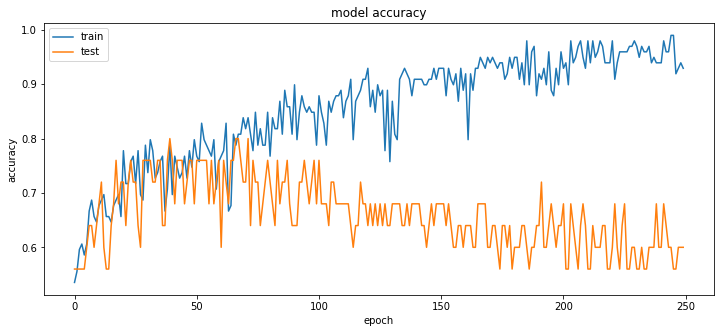

In [15]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

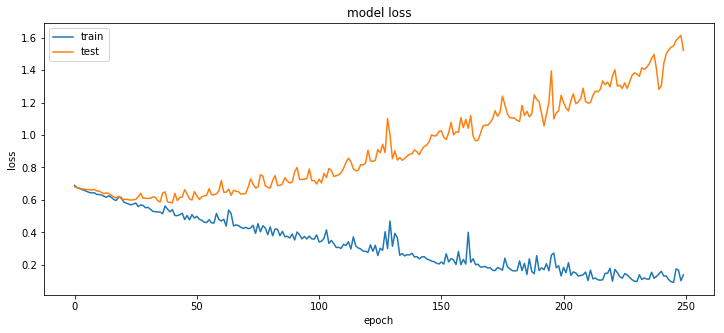

In [16]:
fig,(ax1) = plt.subplots(nrows=1, figsize=(12,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Confusion Matrix¶
Confusion matrix merupakan salah satu metode yang dapat digunakan untuk mengukur kinerja suatu metode klasifikasi.Pada pengukuran kinerja menggunakan confusion matrix, terdapat 4 (empat) istilah sebagai representasi hasil proses klasifikasi yaitu :

1.TP adalah True Positive, yaitu jumlah data positif yang terklasifikasi dengan benar oleh sistem.

2.TN adalah True Negative, yaitu jumlah data negatif yang terklasifikasi dengan benar oleh sistem.

3.FN adalah False Negative, yaitu jumlah data negatif namun terklasifikasi salah oleh sistem.

4.FP adalah False Positive, yaitu jumlah data positif namun terklasifikasi salah oleh sistem

In [17]:
training_predicted = model.predict(X_train)
testing_predicted = model.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix

training_cm = confusion_matrix(Y_train,training_predicted.round())
testing_cm = confusion_matrix(Y_test,testing_predicted.round())

In [19]:
training_cm

array([[63,  5],
       [ 6, 50]], dtype=int64)

Berikut adalah hasil perolehan nilai Accuracy, Specificity, Sensitivity, Precision, dan F1 Score pada data training

In [20]:
#training
tp = training_cm[0][0]
fn = training_cm[0][1]
fp = training_cm[1][0]
tn = training_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy training {0}".format(accuracy))
print("Specificity training {0}".format(specificity))
print("Sensitivity training {0}".format(sensitivity))
print("Precision training {0}".format(precision))
print("F1 Score training {0}".format(f1_score))

Accuracy training 0.9112903225806451
Specificity training 0.8928571428571429
Sensitivity training 0.9264705882352942
Precision training 0.9130434782608695
F1 Score training 0.9197080291970804


ini adalah hasil Confusion Matrix dari data testing

In [21]:
print(testing_cm)

[[ 8  9]
 [ 4 10]]


In [22]:
tp = testing_cm[0][0]
fn = testing_cm[0][1]
fp = testing_cm[1][0]
tn = testing_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy testing {0}".format(accuracy))
print("Specificity testing {0}".format(specificity))
print("Sensitivity testing {0}".format(sensitivity))
print("Precision testing {0}".format(precision))
print("F1 Score testing {0}".format(f1_score))

Accuracy testing 0.5806451612903226
Specificity testing 0.7142857142857143
Sensitivity testing 0.47058823529411764
Precision testing 0.6666666666666666
F1 Score testing 0.5517241379310345


# Kesimpulan
Dari hasil percobaan diatas dapat disimpulkan bahwa dataset hepatitis yang memiliki jumlah data sebanyak 155 mendapatkan akurasi sebesar 91,94% dengan menggunakan Artificial Neural Network.